In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
dataset.value_counts().sum()

10000

In [7]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#no missing data

In [9]:
#dropping the first 3 columns as they have no significance

In [10]:
dataset = dataset.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X = dataset.drop('Exited',axis=1).values

In [13]:
y = dataset['Exited'].values

In [14]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
#encoding the categorical columns, LabelEncoder for Gender (as only options are male and female), and OneHotEncoder for Geography

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
X[:,2] = le.fit_transform(X[:,2])

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])],remainder='passthrough')

In [21]:
X = np.array(ct.fit_transform(X))

In [22]:
X.shape

(10000, 12)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, Dropout

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
ann = Sequential()

In [32]:
ann.add(Dense(12, activation = 'relu'))

In [33]:
ann.add(Dense(6, activation = 'relu'))

In [34]:
#output layer
ann.add(Dense(1, activation = 'sigmoid'))

In [35]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics='accuracy')

In [36]:
ann.fit(x=X_train,y=y_train, batch_size=32, epochs=200, verbose=1)

Epoch 1/200
250/250 [==============================] - 0s 590us/step - loss: 0.5454 - accuracy: 0.7711
Epoch 2/200
250/250 [==============================] - 0s 588us/step - loss: 0.4517 - accuracy: 0.8067
Epoch 3/200
250/250 [==============================] - 0s 593us/step - loss: 0.4291 - accuracy: 0.8142
Epoch 4/200
250/250 [==============================] - 0s 587us/step - loss: 0.4183 - accuracy: 0.8214
Epoch 5/200
250/250 [==============================] - 0s 577us/step - loss: 0.4116 - accuracy: 0.8249
Epoch 6/200
250/250 [==============================] - 0s 588us/step - loss: 0.4064 - accuracy: 0.8275
Epoch 7/200
250/250 [==============================] - 0s 567us/step - loss: 0.4020 - accuracy: 0.8282
Epoch 8/200
250/250 [==============================] - 0s 551us/step - loss: 0.3983 - accuracy: 0.8305
Epoch 9/200
250/250 [==============================] - 0s 560us/step - loss: 0.3941 - accuracy: 0.8300
Epoch 10/200
250/250 [==============================] - 0s 581us/step - l

250/250 [==============================] - 0s 599us/step - loss: 0.3242 - accuracy: 0.8669
Epoch 80/200
250/250 [==============================] - 0s 569us/step - loss: 0.3241 - accuracy: 0.8684
Epoch 81/200
250/250 [==============================] - 0s 554us/step - loss: 0.3243 - accuracy: 0.8669
Epoch 82/200
250/250 [==============================] - 0s 580us/step - loss: 0.3235 - accuracy: 0.8692
Epoch 83/200
250/250 [==============================] - 0s 543us/step - loss: 0.3242 - accuracy: 0.8662
Epoch 84/200
250/250 [==============================] - 0s 553us/step - loss: 0.3238 - accuracy: 0.8674
Epoch 85/200
250/250 [==============================] - 0s 556us/step - loss: 0.3234 - accuracy: 0.8664
Epoch 86/200
250/250 [==============================] - 0s 562us/step - loss: 0.3236 - accuracy: 0.8691
Epoch 87/200
250/250 [==============================] - 0s 547us/step - loss: 0.3234 - accuracy: 0.8684
Epoch 88/200
250/250 [==============================] - 0s 551us/step - loss:

250/250 [==============================] - 0s 553us/step - loss: 0.3203 - accuracy: 0.8680
Epoch 158/200
250/250 [==============================] - 0s 540us/step - loss: 0.3200 - accuracy: 0.8676
Epoch 159/200
250/250 [==============================] - 0s 552us/step - loss: 0.3202 - accuracy: 0.8702
Epoch 160/200
250/250 [==============================] - 0s 570us/step - loss: 0.3196 - accuracy: 0.8687
Epoch 161/200
250/250 [==============================] - 0s 523us/step - loss: 0.3205 - accuracy: 0.8683
Epoch 162/200
250/250 [==============================] - 0s 523us/step - loss: 0.3201 - accuracy: 0.8673
Epoch 163/200
250/250 [==============================] - 0s 550us/step - loss: 0.3200 - accuracy: 0.8699
Epoch 164/200
250/250 [==============================] - 0s 625us/step - loss: 0.3196 - accuracy: 0.8695
Epoch 165/200
250/250 [==============================] - 0s 535us/step - loss: 0.3197 - accuracy: 0.8684
Epoch 166/200
250/250 [==============================] - 0s 583us/ste

In [37]:
losses = pd.DataFrame(ann.history.history)

<AxesSubplot:>

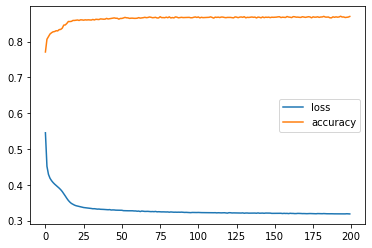

In [39]:
losses.plot()

In [40]:
#adding early stop criteria

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=25, verbose=1)

In [42]:
ann = Sequential()
ann.add(Dense(12, activation = 'relu'))
ann.add(Dense(6, activation = 'relu'))
ann.add(Dense(1, activation = 'sigmoid'))

In [43]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics='accuracy')

In [ ]:
ann.fit(x=X_train,y=y_train, batch_size=32, epochs=200, verbose=1, validation_data=(X_test,y_test),)